# Anàlisi de la població d'Espanya (2002-2025)

## Objectiu
Anàlisi amb **pandas** i **matplotlib** de dades INE (Open Data): evolució de la població, per sexe, per grup d'edat i per nacionalitat.

## Dataset
- **Font:** INE – Cifras de población | **URL:** https://www.ine.es/jaxiT3/Tabla.htm?t=77023  
- **Fitxer:** 77023.csv | Columnes: Provincias, Grupo quinquenal de edad, Nacionalidad, Sexo, Periodo, Total

## 1. Importar llibreries i carregar les dades (read_csv, head)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read_csv: fichero CSV con sep=';', na_values para valores vacíos (teoría: conversión desde fichero)
df = pd.read_csv('77023.csv', sep=';', na_values=['..', '""', ''], low_memory=False)
df.head(10)   # Acceso a las primeras N filas (teoría: mi_dataframe.head(N))

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
0,Total Nacional,Todas las edades,Total,Total,1 de enero de 2025,49.128.297
1,Total Nacional,Todas las edades,Total,Total,1 de enero de 2024,48.619.695
2,Total Nacional,Todas las edades,Total,Total,1 de enero de 2023,48.085.361
3,Total Nacional,Todas las edades,Total,Total,1 de enero de 2022,47.486.727
4,Total Nacional,Todas las edades,Total,Total,1 de enero de 2021,47.400.798
5,Total Nacional,Todas las edades,Total,Total,1 de enero de 2020,47.318.050
6,Total Nacional,Todas las edades,Total,Total,1 de enero de 2019,46.918.951
7,Total Nacional,Todas las edades,Total,Total,1 de enero de 2018,46.645.070
8,Total Nacional,Todas las edades,Total,Total,1 de enero de 2017,46.497.393
9,Total Nacional,Todas las edades,Total,Total,1 de enero de 2016,46.418.884


## 2. Limpieza y conversión de tipos (to_numeric, dropna, .str)


In [2]:
# Conversión de tipos: Total a numérico (pd.to_numeric; trabajo con texto .str.replace)
df['Total'] = pd.to_numeric(df['Total'].astype(str).str.replace('.', '', regex=False), errors='coerce')
# Extraer año de Periodo (.str.extract)
df['Any'] = pd.to_numeric(df['Periodo'].astype(str).str.extract(r'(\d{4})', expand=False), errors='coerce')
# Limpieza de datos nulos: df.dropna(how={'all','any'}) — aquí por columnas
df = df.dropna(subset=['Total', 'Any'])
df.head()

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total,Any
0,Total Nacional,Todas las edades,Total,Total,1 de enero de 2025,49128297.0,2025
1,Total Nacional,Todas las edades,Total,Total,1 de enero de 2024,48619695.0,2024
2,Total Nacional,Todas las edades,Total,Total,1 de enero de 2023,48085361.0,2023
3,Total Nacional,Todas las edades,Total,Total,1 de enero de 2022,47486727.0,2022
4,Total Nacional,Todas las edades,Total,Total,1 de enero de 2021,47400798.0,2021


## 3. Acceso mediante consulta: `df.query('condición')`


In [ ]:
# Acceso mediante consulta — df.query('condición')
d_total = df.query('Provincias == "Total Nacional" and '
    '`Grupo quinquenal de edad` == "Todas las edades" and Nacionalidad == "Total" and Sexo == "Total"')

# Desagregació per sexe (Hombres i Mujeres) a nivell nacional
d_sexe = df.query('Provincias == "Total Nacional" and '
    '`Grupo quinquenal de edad` == "Todas las edades" and Nacionalidad == "Total" and Sexo in ["Hombres", "Mujeres"]')

d_total.head(3)

,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total,Any
0,Total Nacional,Todas las edades,Total,Total,1 de enero de 2025,49128297.0,2025
1,Total Nacional,Todas las edades,Total,Total,1 de enero de 2024,48619695.0,2024
2,Total Nacional,Todas las edades,Total,Total,1 de enero de 2023,48085361.0,2023


## 4. Agrupaciones: groupby + APPLY (agregación) + COMBINE


In [ ]:
# Agrupación: groupby(col).sum() — df_grouped.sum()
pob_per_any = d_total.groupby('Any')['Total'].sum()

# Agrupación por dos columnas: groupby(['Any','Sexo']).sum(); unstack() para formato amplio
pob_sexe = d_sexe.groupby(['Any', 'Sexo'])['Total'].sum().unstack()

print('Població total per any (mostra):')
print(pob_per_any.tail())
print('\nPoblació per sexe (mostra):')
pob_sexe.tail()

Població total per any (mostra):
Any
2021    47400798.0
2022    47486727.0
2023    48085361.0
2024    48619695.0
2025    49128297.0
Name: Total, dtype: float64

Població per sexe (mostra):


Sexo,Hombres,Mujeres
Any,,
2021,23248611.0,24152187.0
2022,23288747.0,24197980.0
2023,23565593.0,24519768.0
2024,23826871.0,24792824.0
2025,24090369.0,25037928.0


## 5. Visualización (df.plot() y matplotlib)


### 5.1 Evolución de la población total (2002-2025)

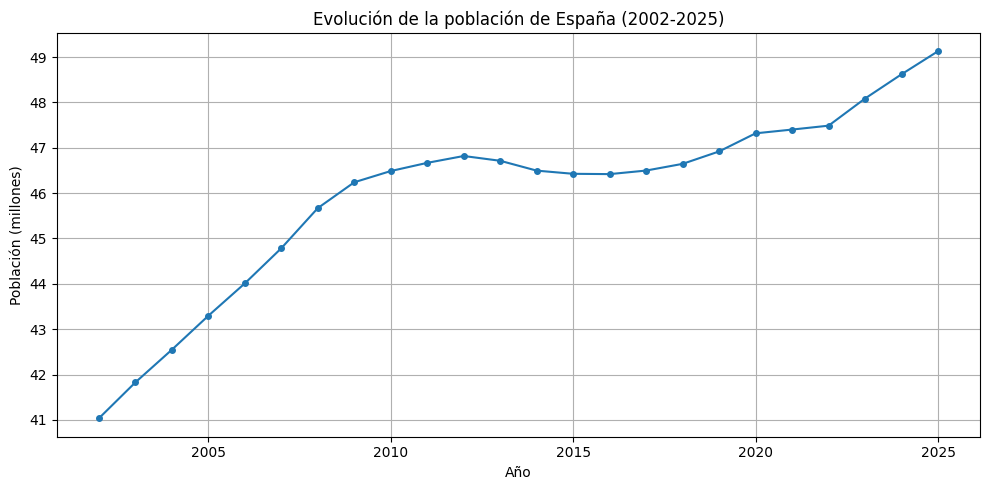

In [ ]:
# df.plot() — visualización incorporada de pandas (backend matplotlib)
(pob_per_any / 1e6).plot(kind='line', title='Evolución de la población de España (2002-2025)',
                         xlabel='Año', ylabel='Población (millones)', grid=True, figsize=(10, 5),
                         style='o-', markersize=4)
plt.tight_layout()
plt.show()

### 5.2 Comparativa Hombres vs Mujeres (evolución)

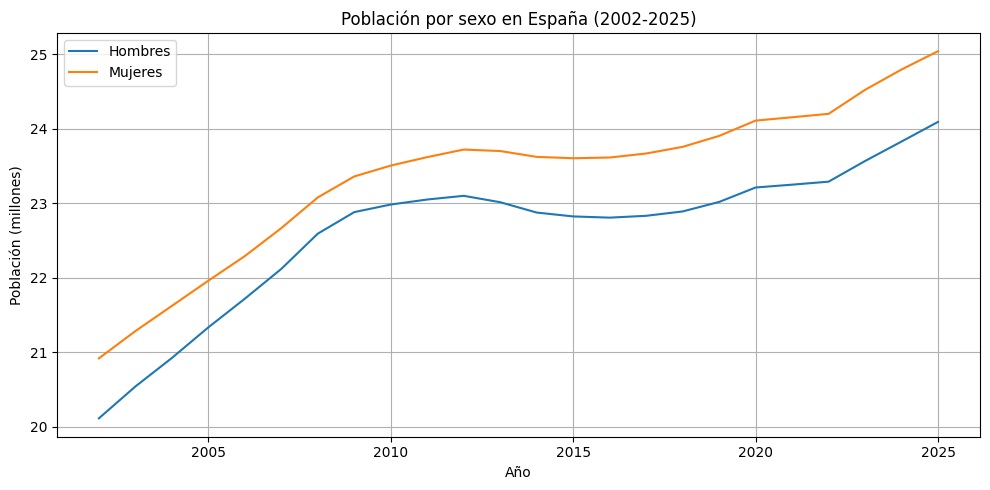

In [6]:
# DataFrame con columnas Hombres y Mujeres → df.plot() dibuja una línea por columna
(pob_sexe / 1e6).plot(kind='line', title='Población por sexo en España (2002-2025)',
                      xlabel='Año', ylabel='Población (millones)', grid=True, figsize=(10, 5))
plt.legend(['Hombres', 'Mujeres'])
plt.tight_layout()
plt.show()

### 5.3 Distribución por grupo quinquenal de edad (año 2025)

Filtro con **query()** (Total Nacional, excl. "Todas las edades"); **groupby** por `Grupo quinquenal de edad` y **.sum()**. Gráfico con matplotlib (barra horizontal).

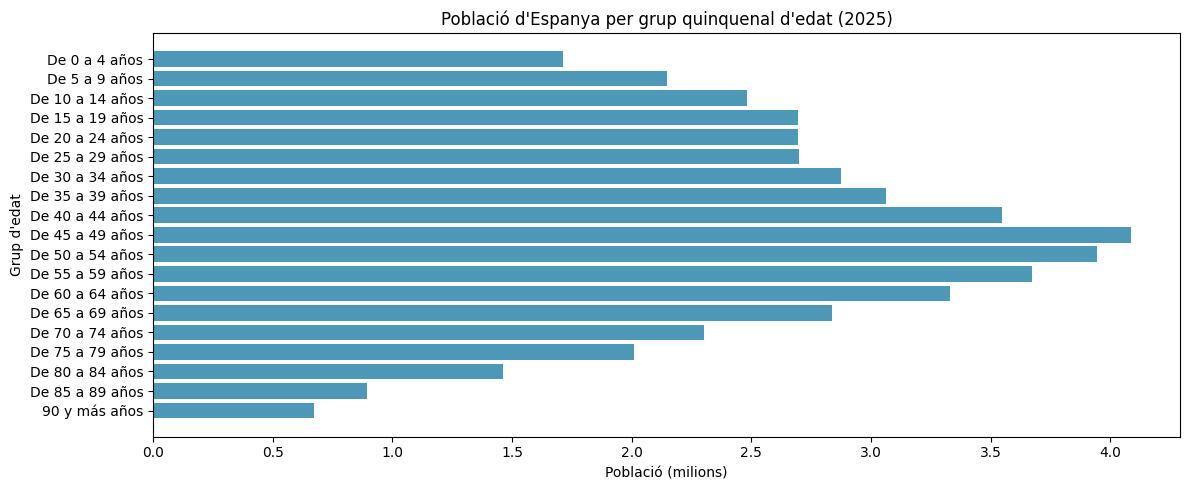

In [7]:
# Query: Total Nacional, excl. "Todas las edades", Nacionalidad i Sexo Total, any 2025
d_edat = df.query('Provincias == "Total Nacional" and `Grupo quinquenal de edad` != "Todas las edades" '
                  'and Nacionalidad == "Total" and Sexo == "Total" and Any == 2025')

# Groupby per grup quinquenal i sumar Total
pob_edat = d_edat.groupby('Grupo quinquenal de edad')['Total'].sum()

# Ordre lògic dels grups d'edat (de menors a majors)
ordre_edat = ['De 0 a 4 años', 'De 5 a 9 años', 'De 10 a 14 años', 'De 15 a 19 años', 'De 20 a 24 años',
              'De 25 a 29 años', 'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años', 'De 45 a 49 años',
              'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años', 'De 65 a 69 años', 'De 70 a 74 años',
              'De 75 a 79 años', 'De 80 a 84 años', 'De 85 a 89 años', '90 y más años']
pob_edat = pob_edat.reindex([g for g in ordre_edat if g in pob_edat.index])

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(pob_edat.index, pob_edat.values / 1e6, color='#2e86ab', alpha=0.85)
ax.set_xlabel('Població (milions)')
ax.set_ylabel('Grup d\'edat')
ax.set_title('Població d\'Espanya per grup quinquenal d\'edat (2025)')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### 5.4 Distribución y evolución por nacionalidad

**query()** con Nacionalidad in ["Española", "Extranjera"]. **groupby(['Any','Nacionalidad']).sum()** y unstack. Gráficos: evolución (líneas) y barras año reciente.

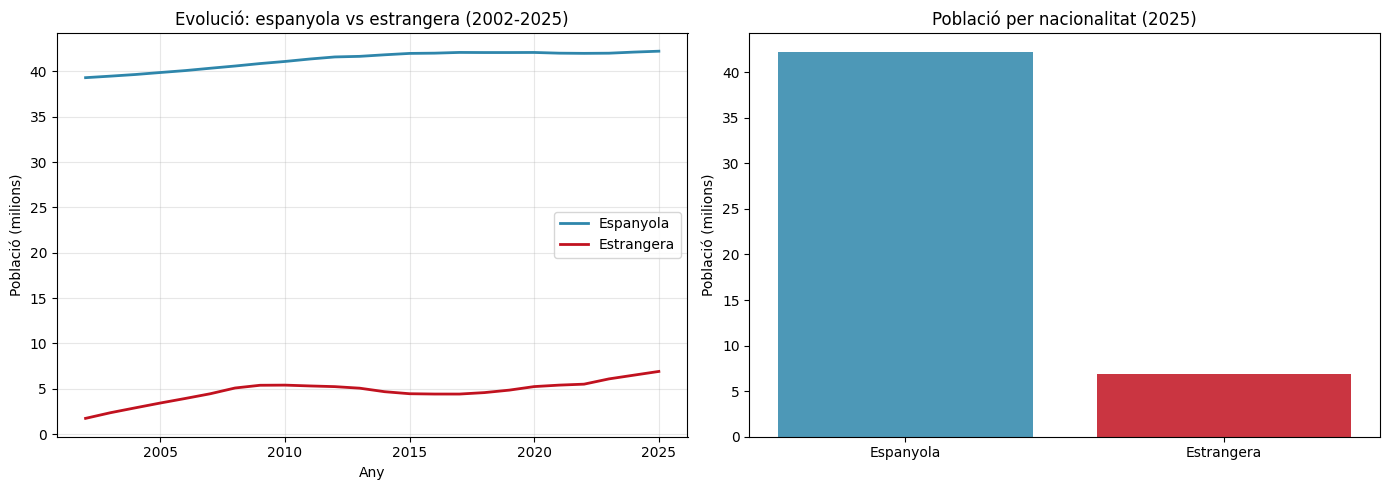

In [8]:
# Query: Total Nacional, Todas las edades, Sexo Total, Española i Extranjera
d_nac = df.query('Provincias == "Total Nacional" and `Grupo quinquenal de edad` == "Todas las edades" '
                 'and Sexo == "Total" and Nacionalidad in ["Española", "Extranjera"]')

# Groupby Any i Nacionalidad, sumar Total (unstack per tenir columnes Española i Extranjera)
pob_nac = d_nac.groupby(['Any', 'Nacionalidad'])['Total'].sum().unstack()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Evolució 2002-2025
axes[0].plot(pob_nac.index, pob_nac['Española'] / 1e6, label='Espanyola', color='#2e86ab', linewidth=2)
axes[0].plot(pob_nac.index, pob_nac['Extranjera'] / 1e6, label='Estrangera', color='#c1121f', linewidth=2)
axes[0].set_xlabel('Any')
axes[0].set_ylabel('Població (milions)')
axes[0].set_title('Evolució: espanyola vs estrangera (2002-2025)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Barres any més recent disponible (p. ex. 2025)
any_recent = int(pob_nac.index.max())
pob_nac_2025 = pob_nac.loc[pob_nac.index.max()]
axes[1].bar(['Espanyola', 'Estrangera'], [pob_nac_2025['Española'] / 1e6, pob_nac_2025['Extranjera'] / 1e6],
            color=['#2e86ab', '#c1121f'], alpha=0.85)
axes[1].set_ylabel('Població (milions)')
axes[1].set_title(f'Població per nacionalitat ({any_recent})')
plt.tight_layout()
plt.show()

## 6. Resum dels resultats

- La població espanyola ha augmentat de manera continuada des de 2002 fins a 2025 (d’uns 41 M a uns 49 M).
- Hi ha més dones que homes en tots els anys; la diferència es manté estable al llarg del període.
- **Per edat:** els grups 40-54 anys són els més nombrosos; la base (0-4, 5-9) és més estreta, típic d’una societat envellida.
- **Per nacionalitat:** la població espanyola es manté al voltant de 41-42 M; la estrangera creix notablement entre 2002 i 2025.